# Effect of a simple RC low-pass filter on a squarewave

More info about LP filters : https://www.electronics-tutorials.ws/filter/filter_2.html

Inspiration for this notebook :  https://notebook.community/mholtrop/Phys605/Python/Signal/RC_Filters_in_Python

## Define the function that corresponds to a low-pass RC filter :

$ \large V_{out}(t) = V_{in}(t) \left(\frac{Z_C}{Z_R + Z_C} \right)= V_{in}(t)\left(\frac{-j/\omega C}{R- j/\omega C} \right) = V_{in}(t)\left(\frac{1}{jR\omega C +1} \right) $

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def rc_low_pass_filter(f, R, C):                    
    omega = 2*np.pi*f
    return 1.0/(1j*R*omega*C+1.0)

The cutoff frequency is defined by :

$ \large f_{c} = \frac{1}{2 \pi R C} $

In [2]:
def rc_low_pass_cutoff(R, C):
    return 1.0/(2*np.pi*R*C)

## Define the filter : 

In [3]:
R=1.0e3    # 1kOhm
C=1.0e-6   # 1µF

fc = rc_low_pass_cutoff(R, C)

print("Filter cut off is: {:7.2f} Hz".format(fc))

Filter cut off is:  159.15 Hz


## Define the square wave :

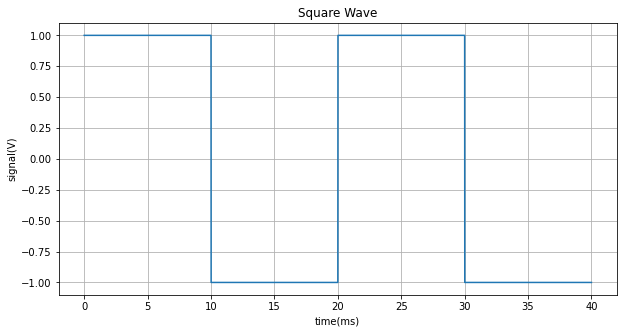

In [4]:
from scipy import signal

# Frequency of the square wave :
f = 50.0   # frequency in [Hz]
T = 1.0/f  # period of the signal in [s]

 # , total time simulated, and the sample spacing in time

# Sample points : 
samples = 2**15                     # a 2^N number of samples make the FFT very fast
periods = 2                         # number of periods to show
delta_t = T * periods / samples     # time corresponding to one sample

t = np.linspace(0, 1/f * periods, samples, endpoint=False)

y = signal.square(2*np.pi*t*f) # Create a square wave wiht a 2 Volt peak to peak (-1V to +1V)

plt.figure(figsize=(10,5))
plt.plot(1e3*t, y)             # Change the x-axis scale to ms by multiplying by 10^3
ax = plt.gca()
plt.grid(True)
plt.title("Square Wave")
plt.xlabel("time(ms)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
plt.show()

## Apply the filter to the square wave :

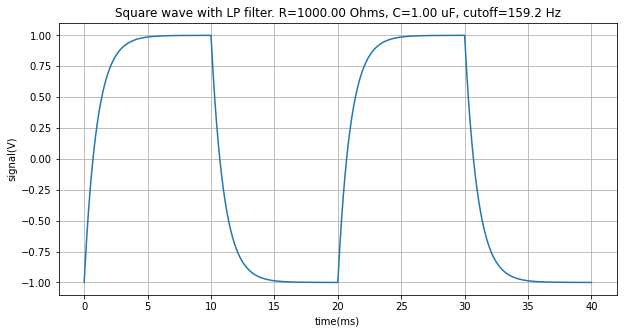

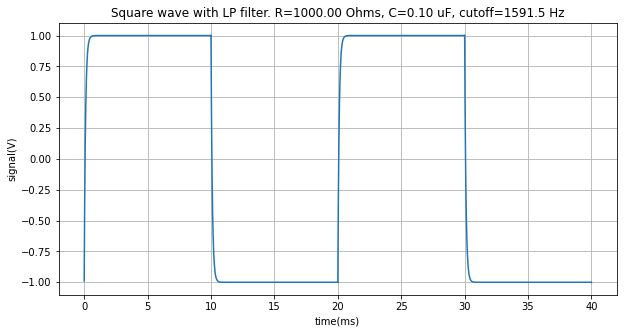

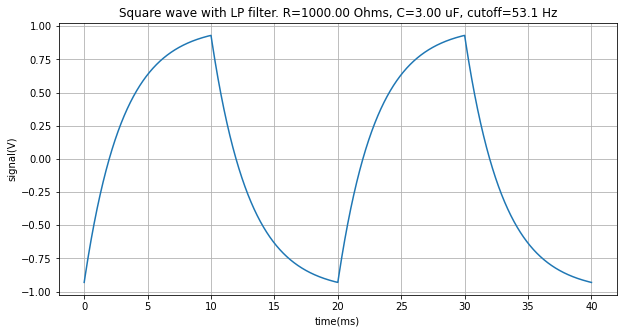

In [8]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift

# helper function : 
def apply_filter_and_plot(R, C, samples, delta_t, y):
    y_out = ifft(fft(y) * rc_low_pass_filter(fftfreq(samples, delta_t), R, C))
    plt.figure(figsize=(10,5))
    plt.plot(1e3*t,np.real(y_out))
    ax = plt.gca()
    plt.grid(True)
    plt.title("Square wave with LP filter. R={:7.2f} Ohms, C={:0.2f} uF, cutoff={:0.1f} Hz".format(R, C*1e6, rc_low_pass_cutoff(R, C)))
    plt.xlabel("time(ms)",position=(0.95,1))
    plt.ylabel("signal(V)",position=(1,0.9))
    plt.show()
    
apply_filter_and_plot(R, C, samples, delta_t, y)    

apply_filter_and_plot(R, C/10, samples, delta_t, y)    

apply_filter_and_plot(R, C*3, samples, delta_t, y)    